## Teletransportación Cuántica
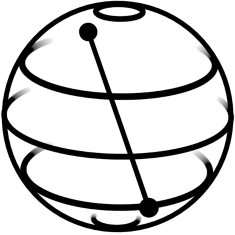

In [1]:
import qiskit as q

# %pip install array_to_latex

from array_to_latex import to_ltx
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
def printarray(array,preface=""):
    printmd("$"+preface+to_ltx(array, frmt = '{:6.2f}', arraytype = 'pmatrix',print_out= False)+"$")


In [2]:
def bell(i):
    """
    Crea una compuerta para generar un estado de bell
    """
    bell_circ = q.QuantumCircuit(2)
    if i%2==1:
        bell_circ.x(0)
    if i>=2:
        bell_circ.x(1)
    bell_circ.h(0)
    bell_circ.cnot(0,1)
    return bell_circ.to_gate(label= f"Bell {i}")


In [3]:
tele = q.QuantumCircuit(3,2)

qubit_to_teleport = q.quantum_info.random_statevector(2)

tele.initialize(qubit_to_teleport,0)

tele.barrier()
# generar par entrelazado
tele.append(bell(0),[1,2])

tele.barrier()

tele.cx(0,1)
tele.h(0)

tele.barrier()

tele.measure(0,0)
tele.measure(1,1)

tele.barrier()

tele.x(2).c_if(1,1)
tele.z(2).c_if(0,1)

tele.barrier()

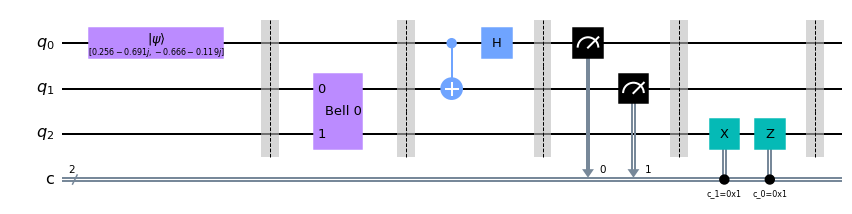

In [4]:
tele.draw("mpl")

In [5]:
statesim = q.Aer.get_backend('statevector_simulator')
out = q.execute(tele,statesim).result().get_statevector()
printarray(out.data)

$\begin{pmatrix}
    0.00 +   0.00j &    0.26 +  -0.69j &    0.00 +   0.00j &    0.00 +   0.00j &   -0.00 +   0.00j &  -0.67 +  -0.12j &   -0.00 +   0.00j &   -0.00 +   0.00j
\end{pmatrix}$

In [6]:
ptrace = q.quantum_info.partial_trace(out,[0,1])
print(ptrace)
final_state = ptrace.to_statevector()
print(final_state)

DensityMatrix([[ 0.54267362+0.j        , -0.08856349+0.49024022j],
               [-0.08856349-0.49024022j,  0.45732638+0.j        ]],
              dims=(2,))
Statevector([ 0.73666384+0.j        , -0.1202224 -0.66548701j],
            dims=(2,))


In [8]:
print(qubit_to_teleport)

Statevector([ 0.2563426 -0.69062442j, -0.66573065-0.11886581j],
            dims=(2,))


In [9]:
import numpy as np
phase = qubit_to_teleport[0]/ final_state.data[0]
print(phase)
print(abs(phase))

(0.3479777102643843-0.9375028070140143j)
1.0


In [10]:

print(final_state.data*phase)
print(qubit_to_teleport.data)

[ 0.2563426 -0.69062442j -0.66573065-0.11886581j]
[ 0.2563426 -0.69062442j -0.66573065-0.11886581j]


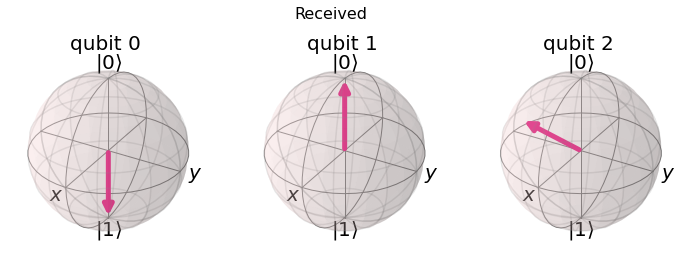

In [11]:
q.visualization.plot_bloch_multivector(out,title="Received")


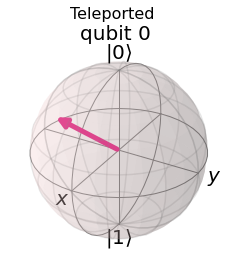

In [12]:
q.visualization.plot_bloch_multivector(qubit_to_teleport,title="Teleported")

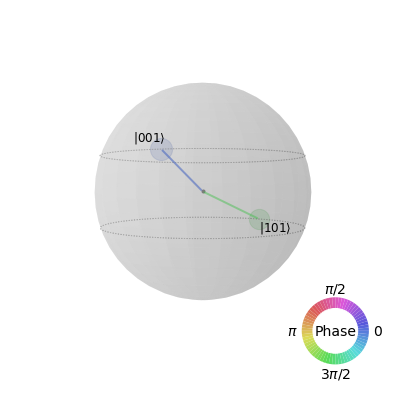

In [13]:
q.visualization.plot_state_qsphere(out)

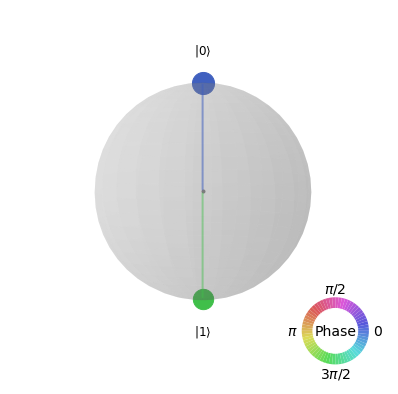

In [14]:
q.visualization.plot_state_qsphere(qubit_to_teleport)